In [24]:
import os
import sys
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [5]:
with open ("C:/Users/Filip/Desktop/FIIT/ING/2.ZS/NS/ml-100k/u.data", "r") as f:
    data = list(csv.reader(f, delimiter="\t"))
data = np.array(data)
film_dim = np.amax(np.array(data[:,1]).astype(np.float))
user_dim = np.amax(np.array(data[:,0]).astype(np.float))
print("film size", film_dim)
print("user size", user_dim)
data = data.astype(np.int)
data = pd.DataFrame(data)
data.sort_values([0,3],inplace=True) ## Sort data
data.rename(columns= {0: 'user_id',
                      1: 'movie_id',
                      2: 'rating',
                      3: 'time'},
            inplace=True)
data_x = []
data_y = []
max_len = 0
for i in range(1, user_dim.astype(np.int)+1):
    user = data[data.user_id == i]
    if len(user) > max_len:
        max_len = len(user)
    data_x.append(user['movie_id'])
    data_y.append(user['rating'])

film size 1682.0
user size 943.0


In [7]:
data.describe()

,user_id,movie_id,rating,time
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 59972 to 92880
Data columns (total 4 columns):
user_id     100000 non-null int32
movie_id    100000 non-null int32
rating      100000 non-null int32
time        100000 non-null int32
dtypes: int32(4)
memory usage: 2.3 MB


C:\Users\Filip\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


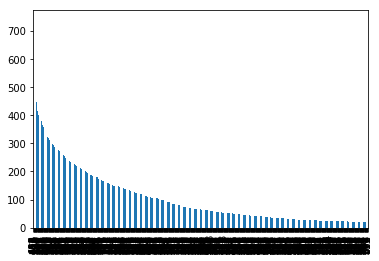

In [38]:
data['user_id'].value_counts().plot("bar")

C:\Users\Filip\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


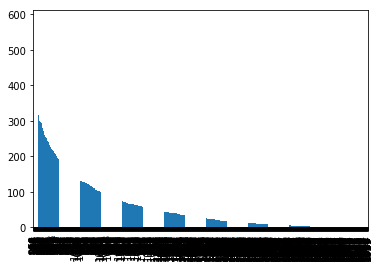

In [39]:
data['movie_id'].value_counts().plot("bar")

C:\Users\Filip\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


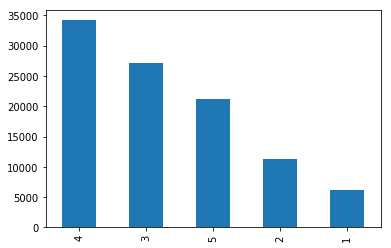

In [40]:
data['rating'].value_counts().plot("bar")

In [19]:
print("average number of ratings per movie " + str(data['movie_id'].count() / data['movie_id'].max()))
print("average number of ratings per user " + str(data['user_id'].count() / data['user_id'].max()))

average number of ratings per movie 59.45303210463734
average number of ratings per user 106.04453870625663


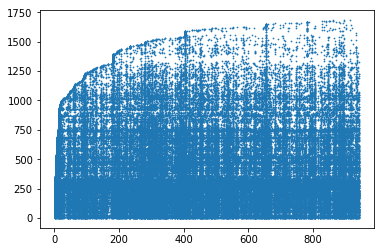

In [34]:
pyplot.scatter(data['user_id'], data['movie_id'], s=0.5)

C:\Users\Filip\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


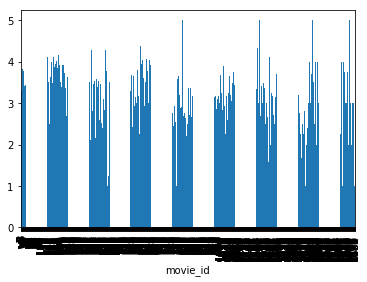

In [50]:
data.groupby("movie_id")['rating'].mean().plot(kind="bar")

C:\Users\Filip\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


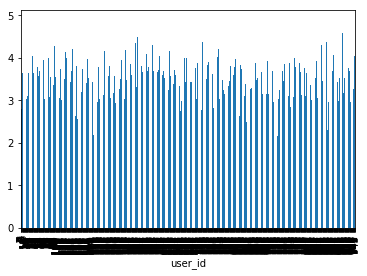

In [48]:
data.groupby("user_id")['rating'].mean().plot(kind="bar")

In [49]:
data.corr()

,user_id,movie_id,rating,time
user_id,1.000000,0.010377,-0.009371,0.019082
movie_id,0.010377,1.000000,-0.189124,0.041867
rating,-0.009371,-0.189124,1.000000,-0.012003
time,0.019082,0.041867,-0.012003,1.000000
